In [1]:
import pandas as pd
import networkx as nx

In [2]:
# for graph visualization
import numpy as np
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores=scores, edge_width=edge_width)
    
    return SVG(image)

# Create Scale Dictionary

In [3]:
scales = {}

# all C scales
scales['Ionian'] = 'C D E F G A B C'
scales['Dorian'] = 'C D Eb F G A Bb C'
scales['Phrygian'] = 'C Db Eb F G Ab Bb C'
scales['Lydian'] = 'C D E F# G A B C'
scales['Mixolydian'] = 'C D E F G A Bb C'
scales['Aeolian'] = 'C D Eb F G Ab Bb C'
scales['Locrian'] = 'C Db Eb F F# Ab Bb C'
scales['Jazz Minor'] = 'C D Eb F G A B C'
scales['Jazz Minor Mode 3'] = 'C D E F# Ab A B C'
scales['Jazz Minor Mode 4'] = 'C D E F# G A Bb C'
scales['Jazz Minor Mode 7'] = 'C Db Eb E F# Ab Bb C'
scales['Harmonic Minor'] = 'C D Eb F G Ab B C'
scales['Harmonic Minor Mode 3'] = 'C D E F Ab A B C'
scales['Harmonic Minor Mode 5'] = 'C Db E F G Ab Bb C'
scales['Harmonic Minor Mode 6'] = 'C Eb E F# G A B C'
scales['Harmonic Major'] = 'C D E F G Ab B C'
scales['Harmonic Major Mode 4'] = 'C D Eb F# G A B C'
scales['Harmonic Major Mode 5'] = 'C Db E F G A Bb C'
scales['Harmonic Major Mode 6'] = 'C Eb E F# Ab A B C'
scales['Major Pentatonic'] = 'C D E G A C'
scales['Minor Pentatonic'] = 'C Eb F G Bb C'
scales['Major Blues'] = 'C D Eb E G A C'
scales['Minor Blues'] = 'C Eb F F# G Bb C'
scales['Blues Scale'] = 'C Eb E F F# G Bb C'

scales

{'Ionian': 'C D E F G A B C',
 'Dorian': 'C D Eb F G A Bb C',
 'Phrygian': 'C Db Eb F G Ab Bb C',
 'Lydian': 'C D E F# G A B C',
 'Mixolydian': 'C D E F G A Bb C',
 'Aeolian': 'C D Eb F G Ab Bb C',
 'Locrian': 'C Db Eb F F# Ab Bb C',
 'Jazz Minor': 'C D Eb F G A B C',
 'Jazz Minor Mode 3': 'C D E F# Ab A B C',
 'Jazz Minor Mode 4': 'C D E F# G A Bb C',
 'Jazz Minor Mode 7': 'C Db Eb E F# Ab Bb C',
 'Harmonic Minor': 'C D Eb F G Ab B C',
 'Harmonic Minor Mode 3': 'C D E F Ab A B C',
 'Harmonic Minor Mode 5': 'C Db E F G Ab Bb C',
 'Harmonic Minor Mode 6': 'C Eb E F# G A B C',
 'Harmonic Major': 'C D E F G Ab B C',
 'Harmonic Major Mode 4': 'C D Eb F# G A B C',
 'Harmonic Major Mode 5': 'C Db E F G A Bb C',
 'Harmonic Major Mode 6': 'C Eb E F# Ab A B C',
 'Major Pentatonic': 'C D E G A C',
 'Minor Pentatonic': 'C Eb F G Bb C',
 'Major Blues': 'C D Eb E G A C',
 'Minor Blues': 'C Eb F F# G Bb C',
 'Blues Scale': 'C Eb E F F# G Bb C'}

In [4]:
# sorted(tfidf_df.columns)

# check each scale before writing; get them perfect

# Scale Similarity (NLP)

In [5]:
scale_df = pd.DataFrame([scales]).T
scale_df.columns = ['notes']

scale_df.head()

,notes
Ionian,C D E F G A B C
Dorian,C D Eb F G A Bb C
Phrygian,C Db Eb F G Ab Bb C
Lydian,C D E F# G A B C
Mixolydian,C D E F G A Bb C


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
def tokenizer(string):
    
    return string.split()

In [8]:
# capture tfidf values from scales
tfidf = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, ngram_range=(1,1), lowercase=True, sublinear_tf=True)
tfidf_docs = tfidf.fit_transform(scale_df['notes'])
tfidf_df = pd.DataFrame(tfidf_docs.toarray(), index=scale_df.index, columns=tfidf.vocabulary_)
tfidf_df.sort_index(inplace=True)
tfidf_df.head()

,c,d,e,f,g,a,b,eb,bb,db,ab,f#
Aeolian,0.000000,0.440731,0.000000,0.400299,0.409791,0.365664,0.0,0.000000,0.365664,0.350044,0.000000,0.296037
Blues Scale,0.000000,0.000000,0.000000,0.402555,0.412101,0.000000,0.0,0.352017,0.367725,0.352017,0.443215,0.297705
Dorian,0.377261,0.000000,0.000000,0.412994,0.422787,0.377261,0.0,0.000000,0.377261,0.361145,0.000000,0.305425
Harmonic Major,0.000000,0.435785,0.435785,0.000000,0.405193,0.361561,0.0,0.346116,0.000000,0.346116,0.000000,0.292715
Harmonic Major Mode 4,0.357673,0.000000,0.431099,0.000000,0.400836,0.357673,0.0,0.000000,0.357673,0.000000,0.431099,0.289567


In [9]:
# capture similarity, using tfidf values
similarity_matrix = cosine_similarity(tfidf_df)
similarity_df = pd.DataFrame(similarity_matrix, index=tfidf_df.index, columns=tfidf_df.index)
similarity_df.head()

,Aeolian,Blues Scale,Dorian,Harmonic Major,Harmonic Major Mode 4,Harmonic Major Mode 5,Harmonic Major Mode 6,Harmonic Minor,Harmonic Minor Mode 3,Harmonic Minor Mode 5,...,Jazz Minor Mode 4,Jazz Minor Mode 7,Locrian,Lydian,Major Blues,Major Pentatonic,Minor Blues,Minor Pentatonic,Mixolydian,Phrygian
Aeolian,1.000000,0.675835,0.831310,0.698128,0.511557,0.504274,0.464312,0.825837,0.598151,0.668698,...,0.549516,0.571519,0.678251,0.382822,0.592459,0.484512,0.722051,0.819784,0.697522,0.787092
Blues Scale,0.675835,1.000000,0.697268,0.497801,0.573985,0.622542,0.582306,0.506159,0.401710,0.606639,...,0.736709,0.682074,0.682074,0.566024,0.583063,0.473250,0.935994,0.824405,0.689785,0.614048
Dorian,0.831310,0.697268,1.000000,0.522114,0.662717,0.649489,0.420560,0.654947,0.556714,0.506977,...,0.704894,0.415081,0.525197,0.530626,0.767524,0.671577,0.744950,0.845783,0.862823,0.629971
Harmonic Major,0.698128,0.497801,0.522114,1.000000,0.564363,0.463690,0.628588,0.875432,0.894396,0.627161,...,0.506064,0.417467,0.417467,0.686553,0.573289,0.629871,0.401672,0.456040,0.650997,0.514181
Harmonic Major Mode 4,0.511557,0.573985,0.662717,0.564363,1.000000,0.356677,0.754529,0.689924,0.595656,0.228183,...,0.701556,0.422502,0.422502,0.876772,0.727673,0.636708,0.613236,0.464475,0.530949,0.345959


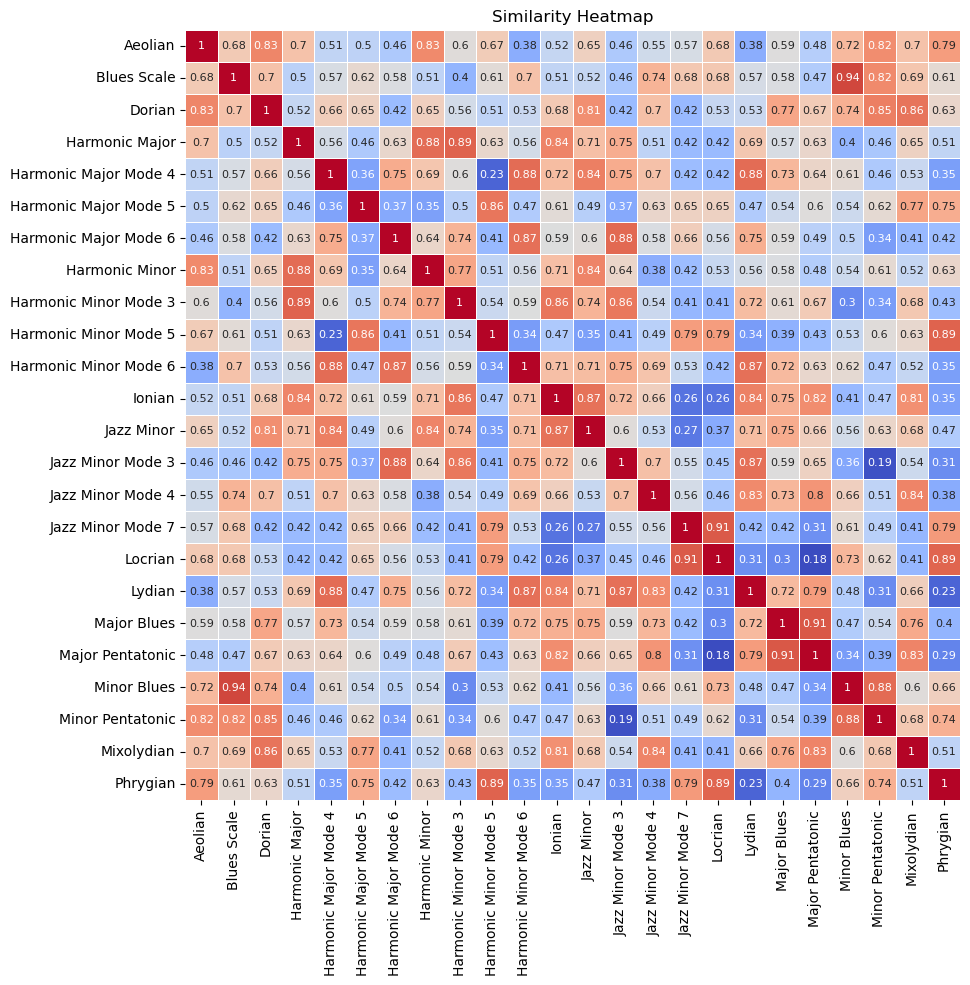

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, annot_kws={"size": 8})
plt.title('Similarity Heatmap')
plt.show()

# Scale Similarity Network

A similarity matrix can be used to create a network. 

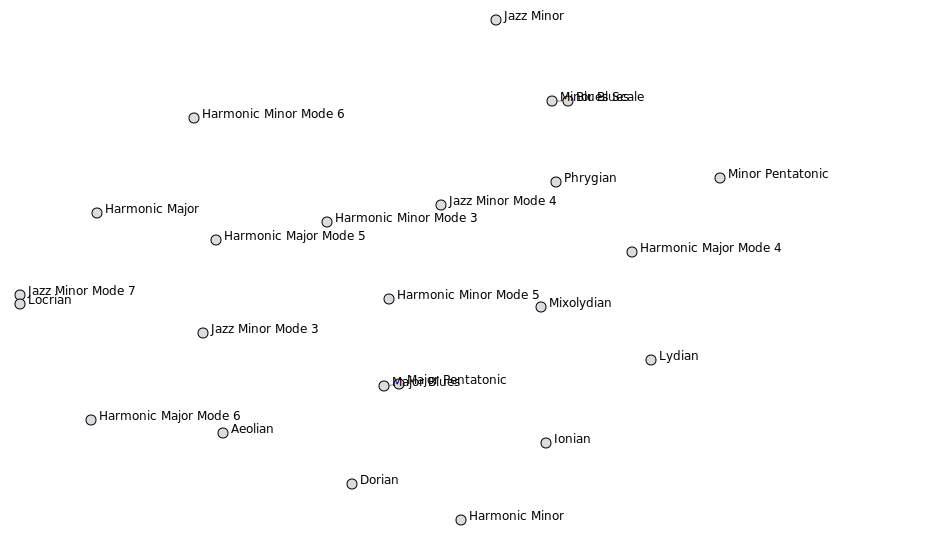

In [11]:
threshold = 0.9

sim_adj = (similarity_df > threshold).astype(int)
G = nx.from_pandas_adjacency(sim_adj)

draw_graph(G, show_names=True, node_size=5, font_size=12)

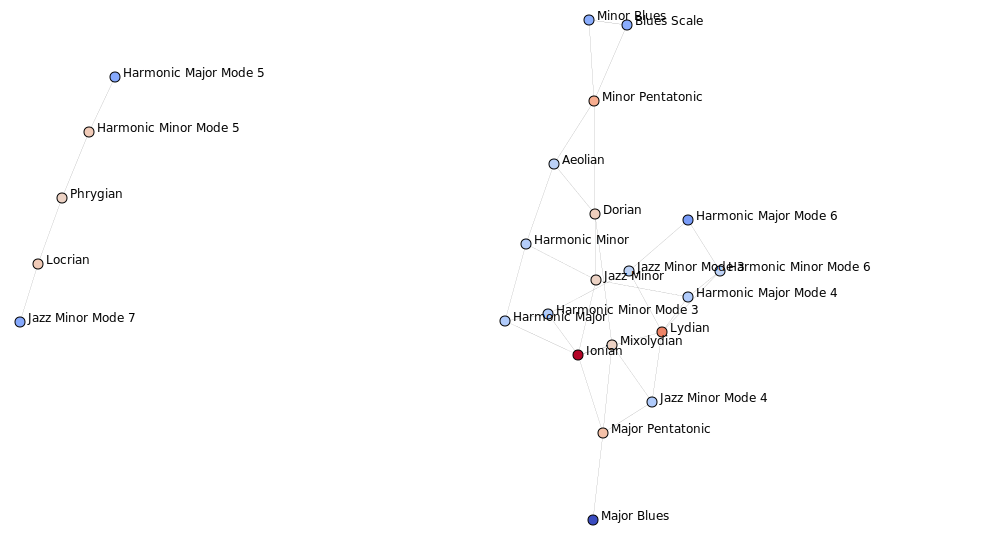

In [27]:
threshold = 0.8

sim_adj = (similarity_df > threshold).astype(int)
G = nx.from_pandas_adjacency(sim_adj)

draw_graph(G, show_names=True, node_size=5, font_size=12, edge_width=0.1)

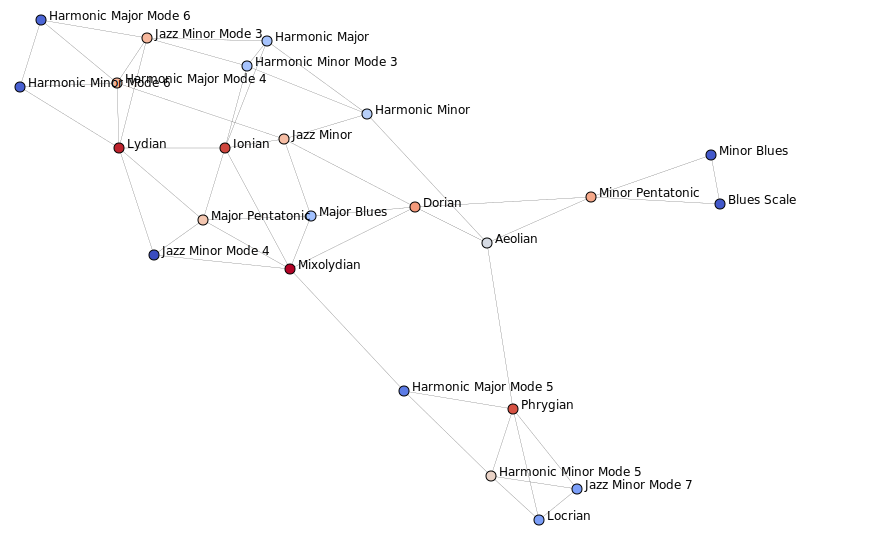

In [28]:
threshold = 0.75

sim_adj = (similarity_df > threshold).astype(int)
G = nx.from_pandas_adjacency(sim_adj)

draw_graph(G, show_names=True, node_size=5, font_size=12, edge_width=0.2)

# Inspect Scale Similarity

In [17]:
def get_similar_scales(scale):
    
    title = 'Most Similar Scales for {}'.format(scale)

    similarity_df[scale].sort_values(ascending=False)[1:11].plot.barh(title=title).invert_yaxis()

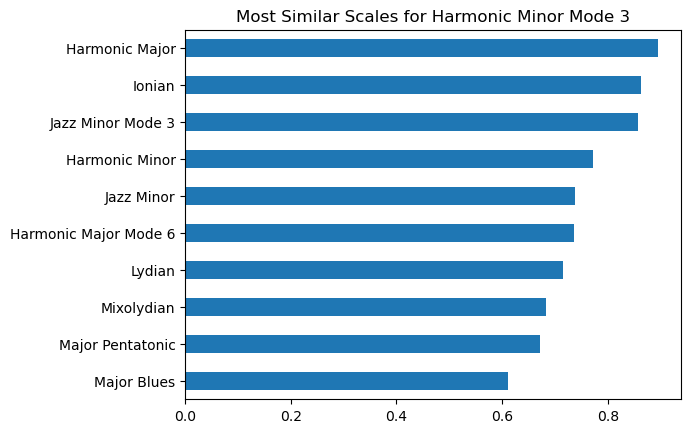

In [18]:
get_similar_scales('Harmonic Minor Mode 3')

In [23]:
scales['Harmonic Minor Mode 3'], scales['Harmonic Major'], scales['Ionian'], scales['Jazz Minor Mode 3']

('C D E F Ab A B C',
 'C D E F G Ab B C',
 'C D E F G A B C',
 'C D E F# Ab A B C')